In [0]:
import tensorflow as tf

In [0]:

import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


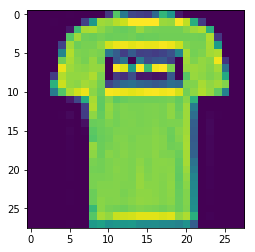

In [5]:
plt.imshow(x_train[1])

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

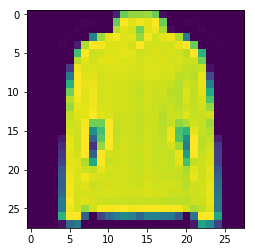

In [8]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [9]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_valid shape: {}'.format(x_valid.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_valid shape: (12000, 28, 28, 1)


In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9fd1ba7a20>>

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train,batch_size=64, epochs=10,validation_data=(x_valid, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 662s 14ms/sample - loss: 0.6662 - acc: 0.7822 - val_loss: 0.3336 - val_acc: 0.8783
Epoch 2/10
48000/48000 [==============================] - 656s 14ms/sample - loss: 0.4165 - acc: 0.8505 - val_loss: 0.3024 - val_acc: 0.8937
Epoch 3/10
48000/48000 [==============================] - 656s 14ms/sample - loss: 0.3442 - acc: 0.8761 - val_loss: 0.2916 - val_acc: 0.8953
Epoch 4/10
48000/48000 [==============================] - 656s 14ms/sample - loss: 0.3173 - acc: 0.8865 - val_loss: 0.2595 - val_acc: 0.9043
Epoch 5/10
48000/48000 [==============================] - 656s 14ms/sample - loss: 0.2963 - acc: 0.8918 - val_loss: 0.2413 - val_acc: 0.9134
Epoch 6/10
48000/48000 [==============================] - 658s 14ms/sample - loss: 0.2780 - acc: 0.9001 - val_loss: 0.2376 - val_acc: 0.9167
Epoch 7/10
48000/48000 [==============================] - 655s 14ms/sample - loss: 0.2667 - acc: 0.9039 

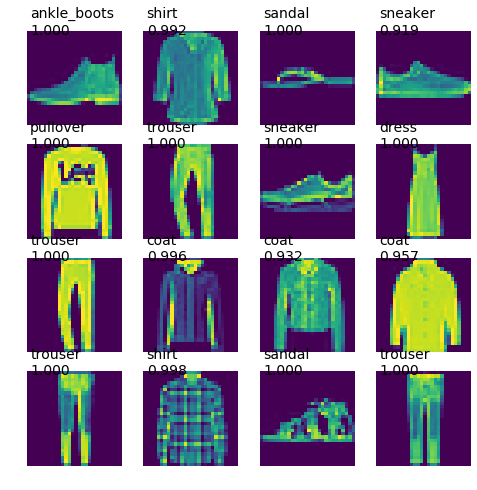

In [19]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(x_test[:16]), 
                 model.predict(x_test[:16]))